In [1]:
import os

download_name = "helper.py"
if not os.path.exists(download_name):
    import requests
    response = requests.get(f"https://raw.githubusercontent.com/bzitko/nlp_repo/main/demos/{download_name}")
    with open(download_name, "wb") as fp:
        fp.write(response.content)
    response.close()

In [2]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

from helper import look


# Binary cross-entropy Loss

$L(\hat{y}, y) = -\frac{1}{n}\sum_{i=1}^{n}(y_i log(\hat{y}_i) + (y_i log(\hat{y}_i))$

# Binary case

In [3]:
torch.manual_seed(0)

# Binary setting ##############################################################
look("# Binary case")
z = torch.randn(5)
look("$z=$", z)
yhat = torch.sigmoid(z)
look("$\hat{y} = \sigma(z)=$", yhat)
y = torch.Tensor([0, 1, 1, 0, 1])
look("$y=$", y)

# First compute the negative log likelihoods using the derived formula
l = -(y * yhat.log() + (1 - y) * (1 - yhat).log())
look("**Negative log-likelihood** $-(y log(\hat{y}) + (1 - y) log(1 - \hat{y}))=$", l)
for yhat_i, y_i, l_i in zip(yhat, y, l):
    look("&nbsp;&nbsp;&nbsp;&nbsp;", y_i.long(), "$ \cdot log($", yhat_i ,"$) + (1 - $", y_i.long(), "$) \cdot log(1-$", yhat_i ,"$)=-$", l_i)

# Observe that BCELoss and BCEWithLogitsLoss can produce the same results
l_BCELoss_nored = torch.nn.BCELoss(reduction="none")(yhat, y)
l_BCEWithLogitsLoss_nored = torch.nn.BCEWithLogitsLoss(reduction="none")(z, y)
look("**BCE** $L(\hat{y}, y)=$", l_BCELoss_nored)
look("**BCELogit** $L(\hat{y}, z)=$", l_BCEWithLogitsLoss_nored)




# Binary case

$z=$ $\begin{bmatrix} 1.54 & -0.293 & -2.18 & 0.568 & -1.08\end{bmatrix}$

$\hat{y} = \sigma(z)=$ $\begin{bmatrix} 0.824 & 0.427 & 0.102 & 0.638 & 0.253\end{bmatrix}$

$y=$ $\begin{bmatrix} 0.0 & 1.0 & 1.0 & 0.0 & 1.0\end{bmatrix}$

**Negative log-likelihood** $-(y log(\hat{y}) + (1 - y) log(1 - \hat{y}))=$ $\begin{bmatrix} 1.74 & 0.851 & 2.29 & 1.02 & 1.38\end{bmatrix}$

&nbsp;&nbsp;&nbsp;&nbsp; 0 $ \cdot log($ 0.824 $) + (1 - $ 0 $) \cdot log(1-$ 0.824 $)=-$ 1.74

&nbsp;&nbsp;&nbsp;&nbsp; 1 $ \cdot log($ 0.427 $) + (1 - $ 1 $) \cdot log(1-$ 0.427 $)=-$ 0.851

&nbsp;&nbsp;&nbsp;&nbsp; 1 $ \cdot log($ 0.102 $) + (1 - $ 1 $) \cdot log(1-$ 0.102 $)=-$ 2.29

&nbsp;&nbsp;&nbsp;&nbsp; 0 $ \cdot log($ 0.638 $) + (1 - $ 0 $) \cdot log(1-$ 0.638 $)=-$ 1.02

&nbsp;&nbsp;&nbsp;&nbsp; 1 $ \cdot log($ 0.253 $) + (1 - $ 1 $) \cdot log(1-$ 0.253 $)=-$ 1.38

**BCE** $L(\hat{y}, y)=$ $\begin{bmatrix} 1.74 & 0.851 & 2.29 & 1.02 & 1.38\end{bmatrix}$

**BCELogit** $L(\hat{y}, z)=$ $\begin{bmatrix} 1.74 & 0.851 & 2.29 & 1.02 & 1.38\end{bmatrix}$

# Multiclass case

In [4]:
# Multiclass setting ##########################################################
look("# Multiclass case")
z = torch.randn(5, 3)
look("$z=$", z)
yhat = torch.softmax(z, dim=-1)
look("$\hat{y} = softmax(z)=$", yhat)
y = torch.Tensor([0, 2, 1, 1, 0]).long()
look("$y=$", y)


# First compute the negative log likelihoods using the derived formulat
look("$-log(\hat{y})=$", -yhat.log())
look("$-log(\hat{y})$", "masked with", "$y=$", -yhat.log()[torch.arange(5), y])

look("$-log(softmax(z))=$", -torch.log_softmax(z, dim=-1))
look("$-log(softmax(z))$", "masked with", "$y=$", -torch.log_softmax(z, dim=-1)[torch.arange(5), y])

# Observe that NLLLoss and CrossEntropyLoss can produce the same results
l2_NLLLoss_nored = torch.nn.NLLLoss(reduction="none")(yhat.log(), y)
look("$NLLLoss(log(\hat{y}), y)$", l2_NLLLoss_nored)
l2_CrossEntropyLoss_nored = torch.nn.CrossEntropyLoss(reduction="none")(z, y)
look("$CELoss(z, y)$", l2_CrossEntropyLoss_nored)



# Multiclass case

$z=$ $\begin{bmatrix} -1.4 & 0.403 & 0.838 \\ -0.719 & -0.403 & -0.597 \\ 0.182 & -0.857 & 1.1 \\ -1.07 & 0.123 & -0.566 \\ 0.373 & -0.892 & -1.51\end{bmatrix}$

$\hat{y} = softmax(z)=$ $\begin{bmatrix} 0.0609 & 0.369 & 0.57 \\ 0.286 & 0.392 & 0.323 \\ 0.259 & 0.0917 & 0.649 \\ 0.168 & 0.554 & 0.278 \\ 0.697 & 0.197 & 0.106\end{bmatrix}$

$y=$ $\begin{bmatrix} 0 & 2 & 1 & 1 & 0\end{bmatrix}$

$-log(\hat{y})=$ $\begin{bmatrix} 2.8 & 0.997 & 0.562 \\ 1.25 & 0.937 & 1.13 \\ 1.35 & 2.39 & 0.432 \\ 1.78 & 0.591 & 1.28 \\ 0.361 & 1.63 & 2.24\end{bmatrix}$

$-log(\hat{y})$ masked with $y=$ $\begin{bmatrix} 2.8 & 1.13 & 2.39 & 0.591 & 0.361\end{bmatrix}$

$-log(softmax(z))=$ $\begin{bmatrix} 2.8 & 0.997 & 0.562 \\ 1.25 & 0.937 & 1.13 \\ 1.35 & 2.39 & 0.432 \\ 1.78 & 0.591 & 1.28 \\ 0.361 & 1.63 & 2.24\end{bmatrix}$

$-log(softmax(z))$ masked with $y=$ $\begin{bmatrix} 2.8 & 1.13 & 2.39 & 0.591 & 0.361\end{bmatrix}$

$NLLLoss(log(\hat{y}), y)$ $\begin{bmatrix} 2.8 & 1.13 & 2.39 & 0.591 & 0.361\end{bmatrix}$

$CELoss(z, y)$ $\begin{bmatrix} 2.8 & 1.13 & 2.39 & 0.591 & 0.361\end{bmatrix}$

## NLL loss visualisation

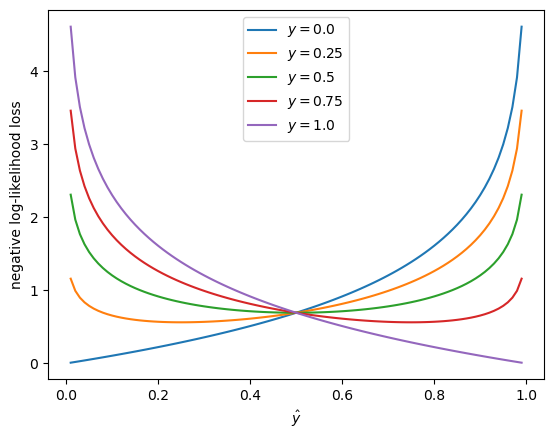

In [30]:
y = torch.arange(0, 1.1, step=0.25)
yhat = torch.arange(0, 1.1, step=0.01)


for y_i in y:
    loglikes = []
    for yhat_i in yhat:
        loglike = -(y_i * yhat_i.log() + (1 - y_i) * (1 - yhat_i).log())
        loglikes.append(loglike)
    plt.plot(yhat, loglikes, label=f"$y={y_i:.2}$")
plt.xlabel("$\hat{y}$")
plt.ylabel("negative log-likelihood loss")
plt.legend()